In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

exel = pd.ExcelFile('member.xls')
df = exel.parse('Лист1')
df = df[['Weight','SS']]
df = df.astype(np.float64)
df.head()

,Weight,SS
1,65.0,4.0
2,NaN,2.0
3,63.0,2.0
4,54.0,1.0
5,50.0,1.0


# Dependency Between Mean And Variance of _Weight_ and _SS_

In [36]:
meandf = df.groupby(['SS']).mean()
meandf

,Weight
SS,
1.0,72.511364
2.0,50.671988
3.0,67.686709
4.0,69.819963


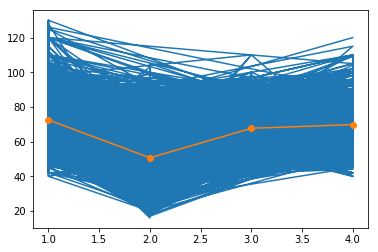

In [40]:
plt.plot('SS', 'Weight', data=df)
plt.errorbar(meandf.index.values, meandf[['Weight']].values, yerr=10, fmt='-o');

In [50]:
from statsmodels.formula.api import ols
results = ols('Weight ~ SS', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     226.7
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           1.25e-50
Time:                        20:18:09   Log-Likelihood:                -39451.
No. Observations:                9351   AIC:                         7.891e+04
Df Residuals:                    9349   BIC:                         7.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.2281      0.344    204.345      0.000      69.554      70.902
SS            -2.5539      0.170    -15.055      0.000      -2.886      -2.221
==============================================================================
Omnibus:                      241.985   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.762
Skew:                          -0.343   Prob(JB):                     1.98e-63
Kurtosis:                       3.520   Cond. No.                         4.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
from scipy import stats

df = df.dropna()

stat, pvalue = stats.levene(df[['Weight']], df[['SS']])
pvalue

array([0.])

Therefore variances are not equal.

In [52]:
import statsmodels.api as sm
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
SS,6.130749e+04,1.0,226.654716,1.250959e-50
Residual,2.528797e+06,9349.0,NaN,NaN


PR(>F) < 0.05 => means are far from being equal